In [36]:
import pandas as pd
import numpy as np

## Loading the dataset

In [ ]:
df_xrp = pd.read_csv("../ModelData/ripple.csv")
df_xrp.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,ignore
0,2018-05-04 08:00:00,0.50000,1.50000,0.5000,0.92300,5090857.33,2018-05-04 08:59:59.999,4.696707e+06,9761,1835315.37,1.692794e+06,0
1,2018-05-04 09:00:00,0.92300,0.92850,0.9010,0.90199,3326696.10,2018-05-04 09:59:59.999,3.047297e+06,5345,876139.27,8.022798e+05,0
2,2018-05-04 10:00:00,0.90199,0.91027,0.8951,0.90128,1176810.48,2018-05-04 10:59:59.999,1.064842e+06,2077,446625.34,4.041818e+05,0
3,2018-05-04 11:00:00,0.90128,0.92130,0.8800,0.91596,1714233.92,2018-05-04 11:59:59.999,1.550126e+06,2886,945299.73,8.556733e+05,0
4,2018-05-04 12:00:00,0.91596,0.92450,0.9000,0.90098,1323800.17,2018-05-04 12:59:59.999,1.207513e+06,2327,530770.12,4.842532e+05,0


In [38]:
rows_to_remove = int(len(df_xrp) * 0.3)
df = df_xrp.iloc[rows_to_remove:].reset_index(drop=True)

df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,ignore
0,2020-08-10 05:00:00,0.29228,0.29483,0.29228,0.29460,12952585.0,2020-08-10 05:59:59.999,3.800841e+06,5838,6372866.6,1.869921e+06,0
1,2020-08-10 06:00:00,0.29459,0.29910,0.29421,0.29897,17492428.5,2020-08-10 06:59:59.999,5.179823e+06,8218,9932701.2,2.943233e+06,0
2,2020-08-10 07:00:00,0.29898,0.30008,0.29641,0.29717,20523330.1,2020-08-10 07:59:59.999,6.120280e+06,9248,9787062.5,2.919717e+06,0
3,2020-08-10 08:00:00,0.29722,0.29880,0.29642,0.29698,13483700.4,2020-08-10 08:59:59.999,4.012412e+06,6849,6858073.0,2.040692e+06,0
4,2020-08-10 09:00:00,0.29700,0.29722,0.29456,0.29529,12779196.6,2020-08-10 09:59:59.999,3.785745e+06,6125,4981132.0,1.475538e+06,0


## Data Discription & Preprocessing

In [39]:
df.describe()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,ignore
count,46261.000000,46261.000000,46261.000000,46261.000000,4.626100e+04,4.626100e+04,4.626100e+04,4.626100e+04,4.626100e+04,46261.0
mean,0.950464,0.957074,0.943393,0.950508,1.881398e+07,1.593656e+07,3.001273e+04,9.322514e+06,7.895552e+06,0.0
std,0.807817,0.813152,0.802168,0.807827,2.885021e+07,2.821230e+07,5.425601e+04,1.436615e+07,1.409011e+07,0.0
min,0.179250,0.189500,0.173510,0.179200,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,0.460900,0.463600,0.458000,0.460900,6.421645e+06,4.258466e+06,5.935000e+03,3.142957e+06,2.108822e+06,0.0
50%,0.585200,0.588800,0.581100,0.585300,1.145967e+07,8.066763e+06,1.210200e+04,5.691164e+06,3.993735e+06,0.0
75%,1.074900,1.082600,1.065700,1.075000,2.049244e+07,1.618862e+07,3.201600e+04,1.010517e+07,7.990827e+06,0.0
max,3.653400,3.660700,3.600300,3.653500,1.404208e+09,7.636114e+08,1.536909e+06,7.047529e+08,3.926688e+08,0.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46261 entries, 0 to 46260
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   open_time               46261 non-null  object 
 1   open                    46261 non-null  float64
 2   high                    46261 non-null  float64
 3   low                     46261 non-null  float64
 4   close                   46261 non-null  float64
 5   volume                  46261 non-null  float64
 6   close_time              46261 non-null  object 
 7   quote_asset_volume      46261 non-null  float64
 8   number_of_trades        46261 non-null  int64  
 9   taker_buy_base_volume   46261 non-null  float64
 10  taker_buy_quote_volume  46261 non-null  float64
 11  ignore                  46261 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 4.2+ MB


In [41]:
df.isnull().sum()

open_time                 0
open                      0
high                      0
low                       0
close                     0
volume                    0
close_time                0
quote_asset_volume        0
number_of_trades          0
taker_buy_base_volume     0
taker_buy_quote_volume    0
ignore                    0
dtype: int64

In [42]:
# Convert open_time to datetime
df['open_time'] = pd.to_datetime(df['open_time'])
df = df.sort_values('open_time').reset_index(drop=True)

In [43]:
print(f"Dataset shape: {df.shape}")
print(f"Date range: {df['open_time'].min()} to {df['open_time'].max()}")

Dataset shape: (46261, 12)
Date range: 2020-08-10 05:00:00 to 2025-11-20 13:00:00


In [44]:
# conversion of time into hour, day, week, month
df['day']       = df['open_time'].dt.day
df['month']     = df['open_time'].dt.month
df['hour']      = df['open_time'].dt.hour
df['dayofweek'] = df['open_time'].dt.dayofweek

In [45]:
!pip install ta

In [46]:
import ta

# Rolling window lengths
WIN_7  = 7
WIN_30 = 30

#  PRICE RETURNS (Momentum Features)
# 1-day percentage change (short-term momentum)
df['ret_1d']  = df['close'].pct_change(1) * 100
# 7-day percentage change (weekly trend)
df['ret_7d']  = df['close'].pct_change(WIN_7) * 100
# 30-day percentage change (monthly trend)
df['ret_30d'] = df['close'].pct_change(WIN_30) * 100


# TECHNICAL INDICATORS (Trend/Momentum)

# RSI (Relative Strength Index) – measures overbought/oversold
df['rsi_val'] = ta.momentum.RSIIndicator(df['close']).rsi()
# EMA20 (short-term trend indicator)
df['ema_20']  = ta.trend.EMAIndicator(df['close'], window=20).ema_indicator()
# SMA50 (medium-term trend indicator)
df['sma_50']  = ta.trend.SMAIndicator(df['close'], window=50).sma_indicator()
# MACD – Captures trend + momentum together
df['macd_val'] = ta.trend.MACD(df['close']).macd()

# LAG FEATURES (Past Prices)

# Yesterday's close price
df['close_lag1'] = df['close'].shift(1)
# Close price 7 days ago
df['close_lag7'] = df['close'].shift(7)

# RAW PRICE FEATURES (Useful for candlestick pattern learning)
df['open_price']   = df['open']
df['high_price']   = df['high']
df['low_price']    = df['low']
df['close_price']  = df['close']
df['trade_volume'] = df['volume']

# Additional lag features
df['close_lag3'] = df['close'].shift(3)

# Renamed EMA for consistency
df['ema_20_smooth'] = df['ema_20']

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


In [47]:
df.drop(columns=["close_time", "quote_asset_volume", "taker_buy_base_volume", "taker_buy_quote_volume", "ignore"], inplace=True)
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,open_time,open,high,low,close,volume,number_of_trades,day,month,hour,...,macd_val,close_lag1,close_lag7,open_price,high_price,low_price,close_price,trade_volume,close_lag3,ema_20_smooth
0,2020-08-10 05:00:00,0.29228,0.29483,0.29228,0.29460,12952585.0,5838,10,8,5,...,NaN,NaN,NaN,0.29228,0.29483,0.29228,0.29460,12952585.0,NaN,NaN
1,2020-08-10 06:00:00,0.29459,0.29910,0.29421,0.29897,17492428.5,8218,10,8,6,...,NaN,0.29460,NaN,0.29459,0.29910,0.29421,0.29897,17492428.5,NaN,NaN
2,2020-08-10 07:00:00,0.29898,0.30008,0.29641,0.29717,20523330.1,9248,10,8,7,...,NaN,0.29897,NaN,0.29898,0.30008,0.29641,0.29717,20523330.1,NaN,NaN
3,2020-08-10 08:00:00,0.29722,0.29880,0.29642,0.29698,13483700.4,6849,10,8,8,...,NaN,0.29717,NaN,0.29722,0.29880,0.29642,0.29698,13483700.4,0.29460,NaN
4,2020-08-10 09:00:00,0.29700,0.29722,0.29456,0.29529,12779196.6,6125,10,8,9,...,NaN,0.29698,NaN,0.29700,0.29722,0.29456,0.29529,12779196.6,0.29897,NaN


In [48]:
df.isnull().sum()

open_time            0
open                 0
high                 0
low                  0
close                0
volume               0
number_of_trades     0
day                  0
month                0
hour                 0
dayofweek            0
ret_1d               1
ret_7d               7
ret_30d             30
rsi_val             13
ema_20              19
sma_50              49
macd_val            25
close_lag1           1
close_lag7           7
open_price           0
high_price           0
low_price            0
close_price          0
trade_volume         0
close_lag3           3
ema_20_smooth       19
dtype: int64

In [49]:
# dropping NANs
df = df.dropna()
df.info()
df_clean = df.copy()

<class 'pandas.core.frame.DataFrame'>
Index: 46212 entries, 49 to 46260
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   open_time         46212 non-null  datetime64[ns]
 1   open              46212 non-null  float64       
 2   high              46212 non-null  float64       
 3   low               46212 non-null  float64       
 4   close             46212 non-null  float64       
 5   volume            46212 non-null  float64       
 6   number_of_trades  46212 non-null  int64         
 7   day               46212 non-null  int32         
 8   month             46212 non-null  int32         
 9   hour              46212 non-null  int32         
 10  dayofweek         46212 non-null  int32         
 11  ret_1d            46212 non-null  float64       
 12  ret_7d            46212 non-null  float64       
 13  ret_30d           46212 non-null  float64       
 14  rsi_val           46212 no


Calculating Mutual Information scores for target 'close'...

------ Mutual Information Scores (Sorted) ------
close_price      8.962119
high_price       4.718940
low_price        4.660832
open_price       4.106556
close_lag1       4.105211
close_lag3       3.570173
ema_20_smooth    3.433316
ema_20           3.433315
close_lag7       3.172961
sma_50           2.937401
month            0.705911
ret_1d           0.677738
day              0.446070
macd_val         0.399313
trade_volume     0.188390
ret_7d           0.159671
ret_30d          0.139047
dayofweek        0.081710
rsi_val          0.079881
hour             0.000000


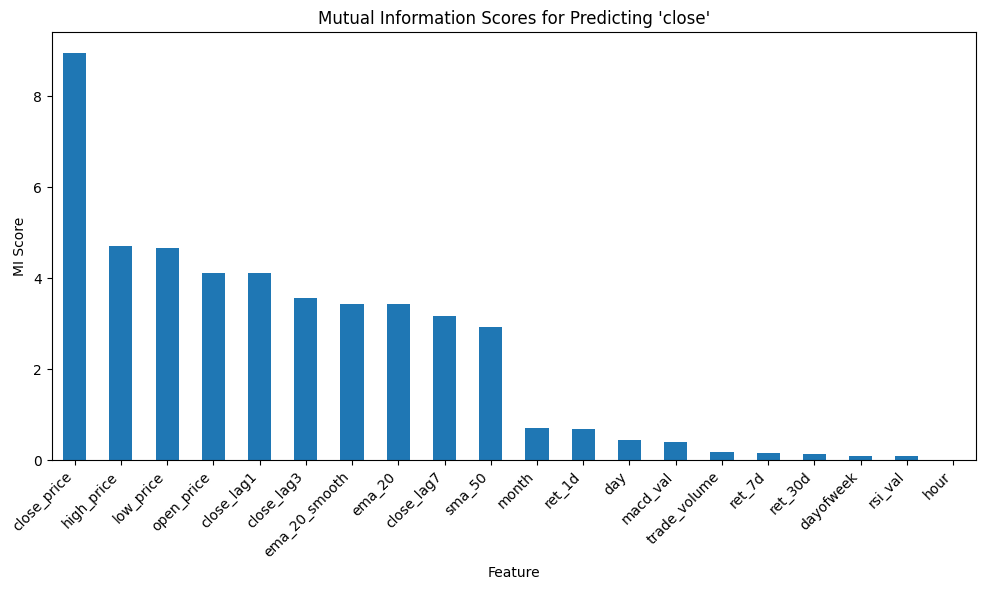

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

TARGET_COL = 'close'

# 1. Features 
features = [
    'ret_1d', 'ret_7d', 'ret_30d',
    'rsi_val', 'ema_20', 'sma_50', 'macd_val',
    'close_lag1', 'close_lag7', 'close_lag3',
    'day', 'month', 'hour', 'dayofweek',
    'open_price', 'high_price', 'low_price', 'close_price',
    'trade_volume', 'ema_20_smooth'
]

# 2. Build Clean DataFrame
df_mi = df[features + [TARGET_COL]].dropna()
# Input feature
X = df_mi[features]
# Target
y = df_mi[TARGET_COL]

# ============================
# 3. Mutual Information Scores
# ============================
print(f"\nCalculating Mutual Information scores for target '{TARGET_COL}'...\n")

mi_scores = mutual_info_regression(X, y, random_state=42)

# Convert to Pandas Series
mi_series = pd.Series(mi_scores, index=features, name='MI Score')
mi_series = mi_series.sort_values(ascending=False)

print("------ Mutual Information Scores (Sorted) ------")
print(mi_series.to_string())

# ============================
# 4. Plot Feature Importance
# ============================
plt.figure(figsize=(10, 6))
mi_series.plot(kind='bar')
plt.title(f"Mutual Information Scores for Predicting '{TARGET_COL}'")
plt.ylabel("MI Score")
plt.xlabel("Feature")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [51]:
cols_to_drop = [
    "open_time", "month", "macd_val", "day", "ret_1d", "ret_7d",
    "ret_30d", "dayofweek", "trade_volume", "rsi_val", "hour"
]

df = df.drop(columns=cols_to_drop)

## Data preparation for Training

In [52]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

y = df[['open', 'close']].copy()
X = df.drop(columns=['open', 'close'], axis=1)

print("X shape:", X.shape)
print("y shape:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

scaler_X = RobustScaler()
scaler_y = RobustScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled  = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled  = scaler_y.transform(y_test)

# Combine X + y back (keeps continuity)
train_scaled = np.hstack([X_train_scaled, y_train_scaled])
test_scaled  = np.hstack([X_test_scaled, y_test_scaled])

# Final continuous dataset for sequence input
full_scaled = np.vstack([train_scaled, test_scaled])

print("Full scaled shape:", full_scaled.shape)
print("Total features:", full_scaled.shape[1])


X shape: (46212, 14)
y shape: (46212, 2)
Full scaled shape: (46212, 16)
Total features: 16


In [53]:
def create_sequences(data, seq_length=60, target_size=2):
    X_seq, y_seq = [], []
    for i in range(seq_length, len(data)):
        # previous 60 rows → features
        X_seq.append(data[i-seq_length:i])

        # target = last 2 columns (open, close)
        y_seq.append(data[i, -target_size:])

    return np.array(X_seq), np.array(y_seq)

In [54]:
SEQ_LENGTH = 60

X_all, y_all = create_sequences(full_scaled, SEQ_LENGTH)

print("Sequence input shape:", X_all.shape)     # (samples, 60, features)
print("Sequence target shape:", y_all.shape)    # (samples, 2)


train_size = int(len(X_all) * 0.7)

X_train = X_all[:train_size]
X_test  = X_all[train_size:]

y_train = y_all[:train_size]
y_test  = y_all[train_size:]

print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)


Sequence input shape: (46152, 60, 16)
Sequence target shape: (46152, 2)
X_train: (32306, 60, 16)
X_test : (13846, 60, 16)
y_train: (32306, 2)
y_test : (13846, 2)


## LSTM Network

In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    
    LSTM(128, return_sequences=True, 
         input_shape=(SEQ_LENGTH, X_train.shape[2]),
         kernel_regularizer=l2(0.002)),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(64, return_sequences=True, kernel_regularizer=l2(0.002)),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(32, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(2)   # open, close
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="mse", metrics=['mae']   # smoother than MSE
)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 60, 128)        │        74,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 60, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 60, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 60, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137,026 (535.26 KB)

 Trainable params: 136,578 (533.51 KB)

 Non-trainable params: 448 (1.75 KB)

In [56]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=10
    )
]

In [63]:
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=256,
    callbacks=callbacks, 
    verbose = 1
)

Epoch 1/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0327 - mae: 0.1208 - val_loss: 8.7357e-04 - val_mae: 0.0086 - learning_rate: 3.1250e-05
Epoch 2/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0294 - mae: 0.1139 - val_loss: 0.0051 - val_mae: 0.0628 - learning_rate: 3.1250e-05
Epoch 3/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0301 - mae: 0.1185 - val_loss: 0.0023 - val_mae: 0.0359 - learning_rate: 3.1250e-05
Epoch 4/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0309 - mae: 0.1176 - val_loss: 0.0021 - val_mae: 0.0332 - learning_rate: 3.1250e-05
Epoch 5/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0286 - mae: 0.1150 - val_loss: 0.0014 - val_mae: 0.0248 - learning_rate: 3.1250e-05
Epoch 6/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0302 - mae: 0.1172 - val_loss: 9.4773e-04 - val_mae: 0.0122 - learning_rate: 3.1250e-05
Epoch 7/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0296 - mae: 0.1158 - val_loss: 9.4794e-0

## Evaluating Model

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions
train_predict = model.predict(X_train)
test_predict  = model.predict(X_test)

# --------- FIX 1: use correct scaler ---------
train_predict = scaler_y.inverse_transform(train_predict)
test_predict  = scaler_y.inverse_transform(test_predict)
y_train_actual = scaler_y.inverse_transform(y_train)
y_test_actual  = scaler_y.inverse_transform(y_test)

# RMSE
train_rmse_open  = np.sqrt(mean_squared_error(y_train_actual[:, 0], train_predict[:, 0]))
train_rmse_close = np.sqrt(mean_squared_error(y_train_actual[:, 1], train_predict[:, 1]))
test_rmse_open   = np.sqrt(mean_squared_error(y_test_actual[:, 0], test_predict[:, 0]))
test_rmse_close  = np.sqrt(mean_squared_error(y_test_actual[:, 1], test_predict[:, 1]))

# R2
train_r2_open  = r2_score(y_train_actual[:, 0], train_predict[:, 0])
train_r2_close = r2_score(y_train_actual[:, 1], train_predict[:, 1])
test_r2_open   = r2_score(y_test_actual[:, 0], test_predict[:, 0])
test_r2_close  = r2_score(y_test_actual[:, 1], test_predict[:, 1])

# MAE
train_mae_open  = mean_absolute_error(y_train_actual[:, 0], train_predict[:, 0])
train_mae_close = mean_absolute_error(y_train_actual[:, 1], train_predict[:, 1])
test_mae_open   = mean_absolute_error(y_test_actual[:, 0], test_predict[:, 0])
test_mae_close  = mean_absolute_error(y_test_actual[:, 1], test_predict[:, 1])

# Direction Accuracy
train_direction_acc_open  = np.mean(np.sign(np.diff(y_train_actual[:, 0])) == np.sign(np.diff(train_predict[:, 0]))) * 100
train_direction_acc_close = np.mean(np.sign(np.diff(y_train_actual[:, 1])) == np.sign(np.diff(train_predict[:, 1]))) * 100
test_direction_acc_open   = np.mean(np.sign(np.diff(y_test_actual[:, 0])) == np.sign(np.diff(test_predict[:, 0]))) * 100
test_direction_acc_close  = np.mean(np.sign(np.diff(y_test_actual[:, 1])) == np.sign(np.diff(test_predict[:, 1]))) * 100

print(f"\n=== Model Performance ===")
print(f"\nTRAINING SET:")
print(f"Open Price  - RMSE: ${train_rmse_open:.2f} | MAE: ${train_mae_open:.2f} | R²: {train_r2_open:.4f} | Direction Accuracy: {train_direction_acc_open:.2f}%")
print(f"Close Price - RMSE: ${train_rmse_close:.2f} | MAE: ${train_mae_close:.2f} | R²: {train_r2_close:.4f} | Direction Accuracy: {train_direction_acc_close:.2f}%")
print(f"\nTEST SET:")
# The goal is to see a significant improvement in these Test Set R² and RMSE values
print(f"Open Price  - RMSE: ${test_rmse_open:.2f} | MAE: ${test_mae_open:.2f} | R²: {test_r2_open:.4f} | Direction Accuracy: {test_direction_acc_open:.2f}%")
print(f"Close Price - RMSE: ${test_rmse_close:.2f} | MAE: ${test_mae_close:.2f} | R²: {test_r2_close:.4f} | Direction Accuracy: {test_direction_acc_close:.2f}%")


1010/1010 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

=== Model Performance ===

TRAINING SET:
Open Price  - RMSE: $0.00 | MAE: $0.00 | R²: 0.9998 | Direction Accuracy: 84.68%
Close Price - RMSE: $0.01 | MAE: $0.00 | R²: 0.9988 | Direction Accuracy: 46.40%

TEST SET:
Open Price  - RMSE: $0.13 | MAE: $0.08 | R²: 0.9824 | Direction Accuracy: 79.88%
Close Price - RMSE: $0.13 | MAE: $0.09 | R²: 0.9820 | Direction Accuracy: 47.27%


## Visualization

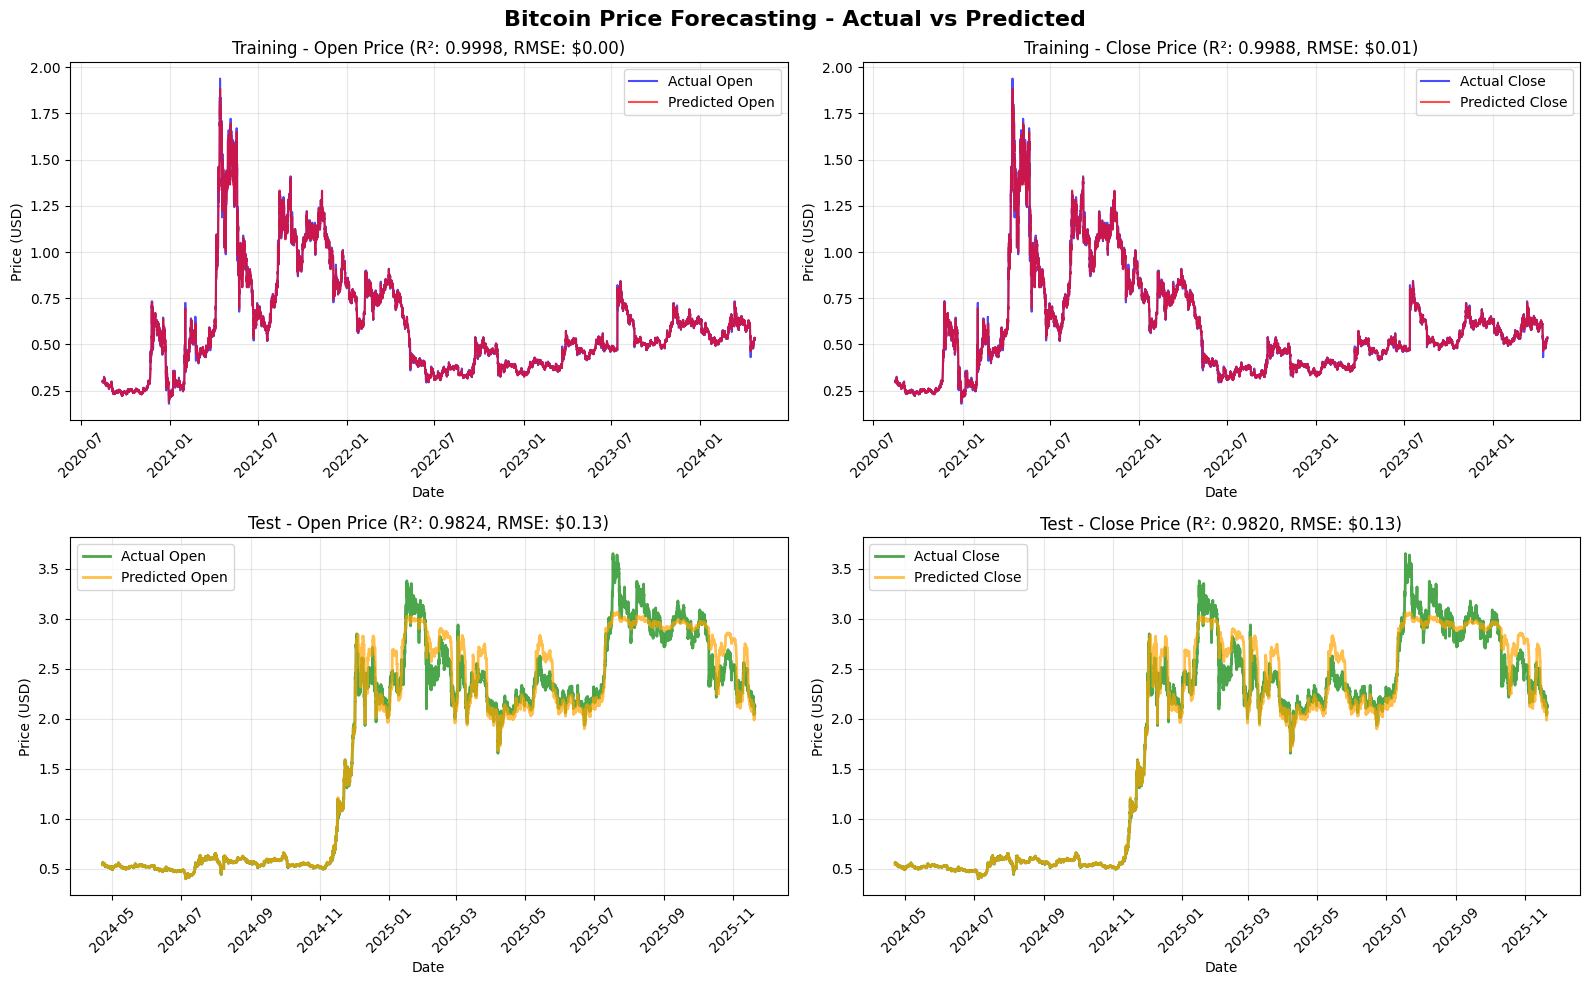

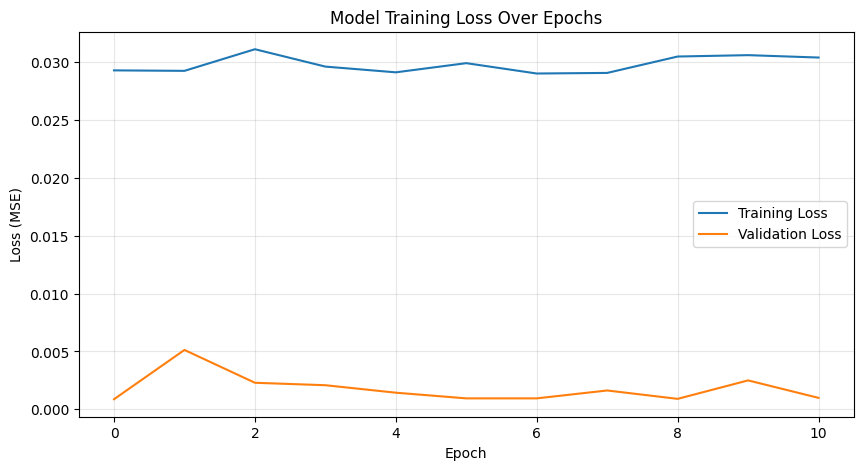


=== Sample Predictions (Last 5 Test Samples) ===
               Date  Actual Open  Predicted Open  Actual Close  Predicted Close
2025-11-20 09:00:00       2.1299        2.068099        2.1192         2.066860
2025-11-20 10:00:00       2.1193        2.059289        2.1210         2.058065
2025-11-20 11:00:00       2.1210        2.059204        2.1158         2.057980
2025-11-20 12:00:00       2.1158        2.052870        2.1267         2.051655
2025-11-20 13:00:00       2.1266        2.060758        2.1252         2.059530


In [65]:
# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Bitcoin Price Forecasting - Actual vs Predicted', fontsize=16, fontweight='bold')

# Get corresponding dates
train_dates = df_clean['open_time'][SEQ_LENGTH:SEQ_LENGTH+len(train_predict)]
test_dates = df_clean['open_time'][SEQ_LENGTH+len(train_predict):SEQ_LENGTH+len(train_predict)+len(test_predict)]

# Plot 1: Training Open Price
axes[0, 0].plot(train_dates, y_train_actual[:, 0], label='Actual Open', color='blue', alpha=0.7)
axes[0, 0].plot(train_dates, train_predict[:, 0], label='Predicted Open', color='red', alpha=0.7)
axes[0, 0].set_title(f'Training - Open Price (R²: {train_r2_open:.4f}, RMSE: ${train_rmse_open:.2f})')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Price (USD)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Training Close Price
axes[0, 1].plot(train_dates, y_train_actual[:, 1], label='Actual Close', color='blue', alpha=0.7)
axes[0, 1].plot(train_dates, train_predict[:, 1], label='Predicted Close', color='red', alpha=0.7)
axes[0, 1].set_title(f'Training - Close Price (R²: {train_r2_close:.4f}, RMSE: ${train_rmse_close:.2f})')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Price (USD)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Test Open Price
axes[1, 0].plot(test_dates, y_test_actual[:, 0], label='Actual Open', color='green', alpha=0.7, linewidth=2)
axes[1, 0].plot(test_dates, test_predict[:, 0], label='Predicted Open', color='orange', alpha=0.7, linewidth=2)
axes[1, 0].set_title(f'Test - Open Price (R²: {test_r2_open:.4f}, RMSE: ${test_rmse_open:.2f})')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Price (USD)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Test Close Price
axes[1, 1].plot(test_dates, y_test_actual[:, 1], label='Actual Close', color='green', alpha=0.7, linewidth=2)
axes[1, 1].plot(test_dates, test_predict[:, 1], label='Predicted Close', color='orange', alpha=0.7, linewidth=2)
axes[1, 1].set_title(f'Test - Close Price (R²: {test_r2_close:.4f}, RMSE: ${test_rmse_close:.2f})')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Price (USD)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Additional plot: Training loss
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(history.history['loss'], label='Training Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')
ax.set_title('Model Training Loss Over Epochs')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss (MSE)')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

# Show sample predictions
print("\n=== Sample Predictions (Last 5 Test Samples) ===")
sample_df = pd.DataFrame({
    'Date': test_dates.values[-5:],
    'Actual Open': y_test_actual[-5:, 0],
    'Predicted Open': test_predict[-5:, 0],
    'Actual Close': y_test_actual[-5:, 1],
    'Predicted Close': test_predict[-5:, 1]
})
print(sample_df.to_string(index=False))